In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql
import folium 
from simple_colors import *
import itertools

# Unlimited columns. 
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Set a standard theme and color palette for consistency across the nb

PAL = 'ch:s=.35,rot=-.35'
sns.set_theme(
    font_scale=1,
    palette=sns.set_palette(sns.color_palette(PAL, as_cmap=False)),
    rc={'figure.figsize':(20,10)}
) 

In [3]:
dpath = '../data/raw/'

In [4]:
# Ingest the data to allow pandas to read the csv files
ACCIDENT_df = pd.read_csv(dpath + 'ACCIDENT.csv') 
ACCIDENT_CHAINAGE_df = pd.read_csv(dpath + 'ACCIDENT_CHAINAGE.csv') 
ACCIDENT_EVENT_df = pd.read_csv(dpath + 'ACCIDENT_EVENT.csv') 
ACCIDENT_LOCATION_df = pd.read_csv(dpath + 'ACCIDENT_LOCATION.csv') 
ATMOSPHERIC_COND_df = pd.read_csv(dpath + 'ATMOSPHERIC_COND.csv') 
NODE_ID_COMPLEX_INT_ID_df = pd.read_csv(dpath + 'NODE_ID_COMPLEX_INT_ID.csv') 
NODE_df = pd.read_csv(dpath + 'NODE.csv') 
PERSON_df = pd.read_csv(dpath + 'PERSON.csv') 
ROAD_SURFACE_COND_df = pd.read_csv(dpath + 'ROAD_SURFACE_COND.csv') 
SUBDCA_df = pd.read_csv(dpath + 'SUBDCA.csv') 
VEHICLE_df = pd.read_csv(dpath + 'VEHICLE.csv') 

/tmp/ipykernel_11365/2944388308.py:2: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ACCIDENT_df = pd.read_csv(dpath + 'ACCIDENT.csv')
/tmp/ipykernel_11365/2944388308.py:9: DtypeWarning: Columns (6,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  PERSON_df = pd.read_csv(dpath + 'PERSON.csv')
/tmp/ipykernel_11365/2944388308.py:12: DtypeWarning: Columns (3,25,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  VEHICLE_df = pd.read_csv(dpath + 'VEHICLE.csv')


In [5]:
# Create a dictionary for the dataframes
dframes = {'Accident': ACCIDENT_df,
           'Accident_Chainage': ACCIDENT_CHAINAGE_df,
           'Accident_Event': ACCIDENT_EVENT_df,
           'Accident_Location': ACCIDENT_LOCATION_df,
           'Atmospheric_Conditions': ATMOSPHERIC_COND_df,
           'Node_ID_CMPLX': NODE_ID_COMPLEX_INT_ID_df,
           'Node': NODE_df,
           'Person': PERSON_df,
           'Road_Surface_Conditions': ROAD_SURFACE_COND_df,
           'SUBDCA': SUBDCA_df,
           'Vehicle': VEHICLE_df } 


In [6]:
# Display the top 5 rows of each dataframe in dframes
n = 5
for key, value in dframes.items():
    print(blue(f'\n The {key} dataframe is:')) 

    display(value.head(n))


 The Accident dataframe is:


,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91A,G,7,1,Day,43078,3,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91,H,8,1,Day,29720,2,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,40,169,C,11,1,Day,203074,1,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,88,J,8,1,Day,55462,2,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,40,169,G,5,1,Day,202988,2,3,0,3,0,0,1,5,Not at intersection,3,50



 The Accident_Chainage dataframe is:


,Node Id,Route No,Chainage Seq,Route Link No,Chainage
0,4,109454.0,1.0,109454801.0,908.0
1,4,114095.0,2.0,114095801.0,559.0
2,6,183250.0,1.0,183250801.0,2536.0
3,6,216298.0,2.0,216298801.0,528.0
4,11,2500.0,1.0,25008008.0,801.0



 The Accident_Event dataframe is:


,ACCIDENT_NO,EVENT_SEQ_NO,EVENT_TYPE,Event Type Desc,VEHICLE_1_ID,VEHICLE_1_COLL_PT,Vehicle 1 Coll Pt Desc,VEHICLE_2_ID,VEHICLE_2_COLL_PT,Vehicle 2 Coll Pt Desc,PERSON_ID,OBJECT_TYPE,Object Type Desc
0,T20060000010,1.0,C,Collision,B,2,Right side (forwards),A,F,Front,,99.0,Not Applicable
1,T20060000018,1.0,C,Collision,B,F,Front,A,9,Not known or Not Applicable,,99.0,Not Applicable
2,T20060000022,1.0,2,Fell from vehicle,A,9,Not known or Not Applicable,,,,01,99.0,Not Applicable
3,T20060000023,1.0,C,Collision,A,F,Front,B,R,Rear,,99.0,Not Applicable
4,T20060000026,1.0,C,Collision,A,9,Not known or Not Applicable,B,9,Not known or Not Applicable,,99.0,Not Applicable



 The Accident_Location dataframe is:


,ACCIDENT_NO,NODE_ID,ROAD_ROUTE_1,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,DISTANCE_LOCATION,DIRECTION_LOCATION,NEAREST_KM_POST,OFF_ROAD_LOCATION
0,T20060000010,43078,2090.0,FOSTER,STREET,MCCRAE,STREET,0.0,SW,NaN,NaN
1,T20060000018,29720,5057.0,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,70.0,S,NaN,NaN
2,T20060000022,203074,9999.0,BROWNS,ROAD,TRUEMANS,ROAD,210.0,W,NaN,NaN
3,T20060000023,55462,2400.0,SPRINGVALE,ROAD,KEYSBOROUGH,AVENUE,0.0,N,NaN,NaN
4,T20060000026,202988,9999.0,ELIZABETH,AVENUE,GREENHOOD,CRESCENT,20.0,N,NaN,NaN



 The Atmospheric_Conditions dataframe is:


,ACCIDENT_NO,ATMOSPH_COND,ATMOSPH_COND_SEQ,Atmosph Cond Desc
0,T20060000010,1,1,Clear
1,T20060000018,1,1,Clear
2,T20060000022,1,1,Clear
3,T20060000023,1,1,Clear
4,T20060000026,1,1,Clear



 The Node_ID_CMPLX dataframe is:


,ACCIDENT_NO,NODE_ID,COMPLEX_INT_NO
0,T20060000010,43078,NaN
1,T20060000018,29720,NaN
2,T20060000022,203074,NaN
3,T20060000023,55462,NaN
4,T20060000026,202988,NaN



 The Node dataframe is:


,ACCIDENT_NO,NODE_ID,NODE_TYPE,VICGRID94_X,VICGRID94_Y,LGA_NAME,LGA_NAME_ALL,REGION_NAME,DEG_URBAN_NAME,Lat,Long,POSTCODE_NO
0,T20060002689,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
1,T20060010827,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
2,T20060017279,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
3,T20060041762,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
4,T20060047478,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051



 The Person dataframe is:


,ACCIDENT_NO,PERSON_ID,VEHICLE_ID,SEX,AGE,Age Group,INJ_LEVEL,Inj Level Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road User Type Desc,LICENCE_STATE,PEDEST_MOVEMENT,POSTCODE,TAKEN_HOSPITAL,EJECTED_CODE
0,T20060000010,01,A,F,NaN,unknown,4,Not injured,LF,1,3,Passengers,,0,3130.0,,0
1,T20060000010,02,C,M,43.0,40-49,4,Not injured,LF,1,3,Passengers,,0,7310.0,,0
2,T20060000010,03,C,M,22.0,22-25,4,Not injured,LR,1,3,Passengers,,0,7310.0,,0
3,T20060000010,A,A,M,72.0,70+,4,Not injured,D,1,2,Drivers,V,0,3130.0,,0
4,T20060000010,B,B,F,62.0,60-64,3,Other injury,D,1,2,Drivers,V,0,NaN,N,0



 The Road_Surface_Conditions dataframe is:


,ACCIDENT_NO,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
0,T20060000010,1,Dry,1
1,T20060000018,1,Dry,1
2,T20060000022,1,Dry,1
3,T20060000023,1,Dry,1
4,T20060000026,1,Dry,1



 The SUBDCA dataframe is:


,ACCIDENT_NO,SUB_DCA_CODE,SUB_DCA_SEQ,Sub Dca Code Desc
0,T20060000010,NRQ,1,Not Required
1,T20060000018,NRQ,1,Not Required
2,T20060000022,X02,1,Fell from vehicle
3,T20060000023,A01,2,Vehicle entering intersection
4,T20060000023,N02,1,Mid-block



 The Vehicle dataframe is:


,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,Road Surface Type Desc,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_POWER,VEHICLE_TYPE,Vehicle Type Desc,VEHICLE_WEIGHT,CONSTRUCTION_TYPE,FUEL_TYPE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,CARRY_CAPACITY,CUBIC_CAPACITY,FINAL_DIRECTION,DRIVER_INTENT,VEHICLE_MOVEMENT,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,OWNER_POSTCODE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,Traffic Control Desc
0,T20060000010,A,1996.0,2,SW,1,Paved,V,SEDAN,MITSUB,MAGNA,NaN,1,Car,NaN,,Z,NaN,NaN,NaN,1100.0,2.0,1100.0,NaN,SW,1,1,H,MRN,ZZ,2,F,2,3,3130.0,1,1,Stop-go lights
1,T20060000010,B,2003.0,1,NW,1,Paved,V,COUPE,UNKN,GETZ,NaN,1,Car,NaN,,Z,NaN,NaN,NaN,974.0,1.0,974.0,NaN,NE,2,2,H,BLU,ZZ,2,2,2,3,3977.0,1,1,Stop-go lights
2,T20060000010,C,2001.0,8,NW,1,Paved,V,SEDAN,FORD,FALCON,NaN,3,Taxi,NaN,,Z,NaN,NaN,NaN,1550.0,3.0,1550.0,NaN,NW,2,2,H,YLW,ZZ,2,F,2,2,3804.0,2,1,Stop-go lights
3,T20060000018,A,1998.0,2,S,1,Paved,V,DC UTE,TOYOTA,HILXU,NaN,4,Utility,2730.0,,Z,NaN,NaN,NaN,1500.0,1.0,1230.0,NaN,S,1,1,H,GRY,ZZ,2,9,0,3,3175.0,1,0,No control
4,T20060000018,B,1991.0,1,N,1,Paved,V,SEDAN,SUBARU,LIBER,NaN,1,Car,NaN,,Z,NaN,NaN,NaN,1200.0,3.0,1200.0,NaN,NE,2,2,H,BLU,ZZ,2,F,0,5,3805.0,1,11,Giveway sign


In [7]:
# Create a text file with dtypes to create ERD
with open('columns.txt', 'w') as f:
    for key, value in dframes.items():
        f.write(f"Column Headers for {key} dataframe: {value.dtypes}\n")
        f.write(f"No. of cols: {value.shape[1]}\n")
        f.write("\n")  # Writes a newline


In [8]:
## Data Cleaning 
## Clean coloumn names:
##  - whitespaces replaced by underscores
##  - all letters lowercase

for dframe_name, dframe in dframes.items():
    dframe.columns = dframe.columns.str.replace(' ', '_')
    dframe.columns = dframe.columns.str.lower()

In [9]:
## Repeated value checks

repeated_vals = []
for dframe_name, dframe in dframes.items():
    repeated = dframe.duplicated().sum()
    repeated_vals.append(repeated)
repeated_vals

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
## Date Time Columns
ACCIDENT_df["accidentdate"] = pd.to_datetime(ACCIDENT_df["accidentdate"])

/tmp/ipykernel_11365/423281662.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ACCIDENT_df["accidentdate"] = pd.to_datetime(ACCIDENT_df["accidentdate"])


In [11]:
ACCIDENT_df.head(2)

,accident_no,accidentdate,accidenttime,accident_type,accident_type_desc,day_of_week,day_week_description,dca_code,dca_description,directory,edition,page,grid_reference_x,grid_reference_y,light_condition,light_condition_desc,node_id,no_of_vehicles,no_persons,no_persons_inj_2,no_persons_inj_3,no_persons_killed,no_persons_not_inj,police_attend,road_geometry,road_geometry_desc,severity,speed_zone
0,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91A,G,7,1,Day,43078,3,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,2006-01-13,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91,H,8,1,Day,29720,2,4,0,1,0,3,1,2,T intersection,3,70


The Accident table's missing value plot is: 



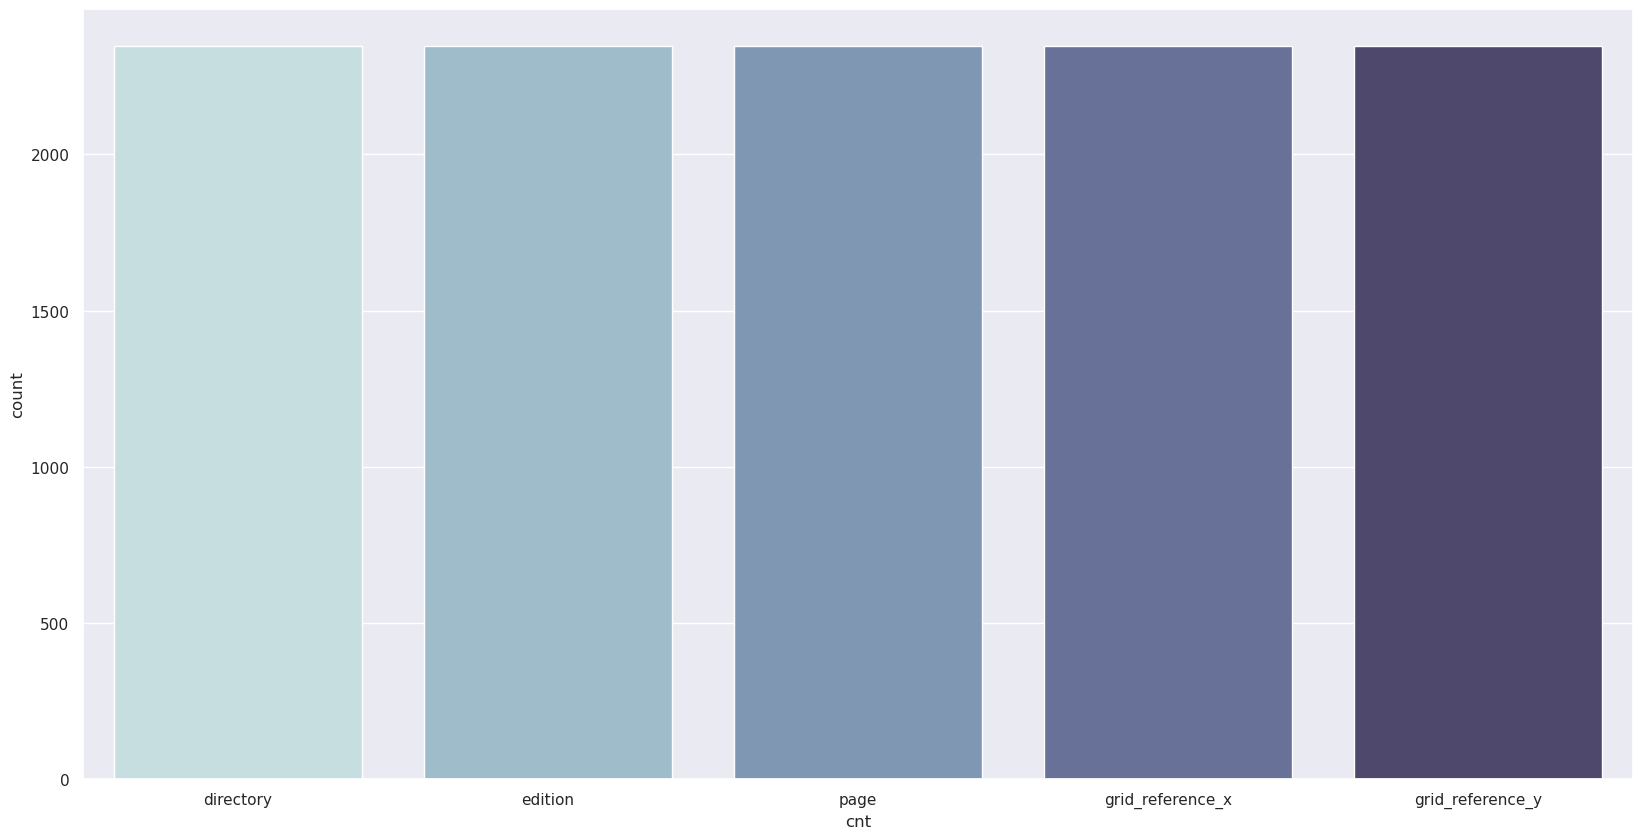

The Accident_Chainage table's missing value plot is: 



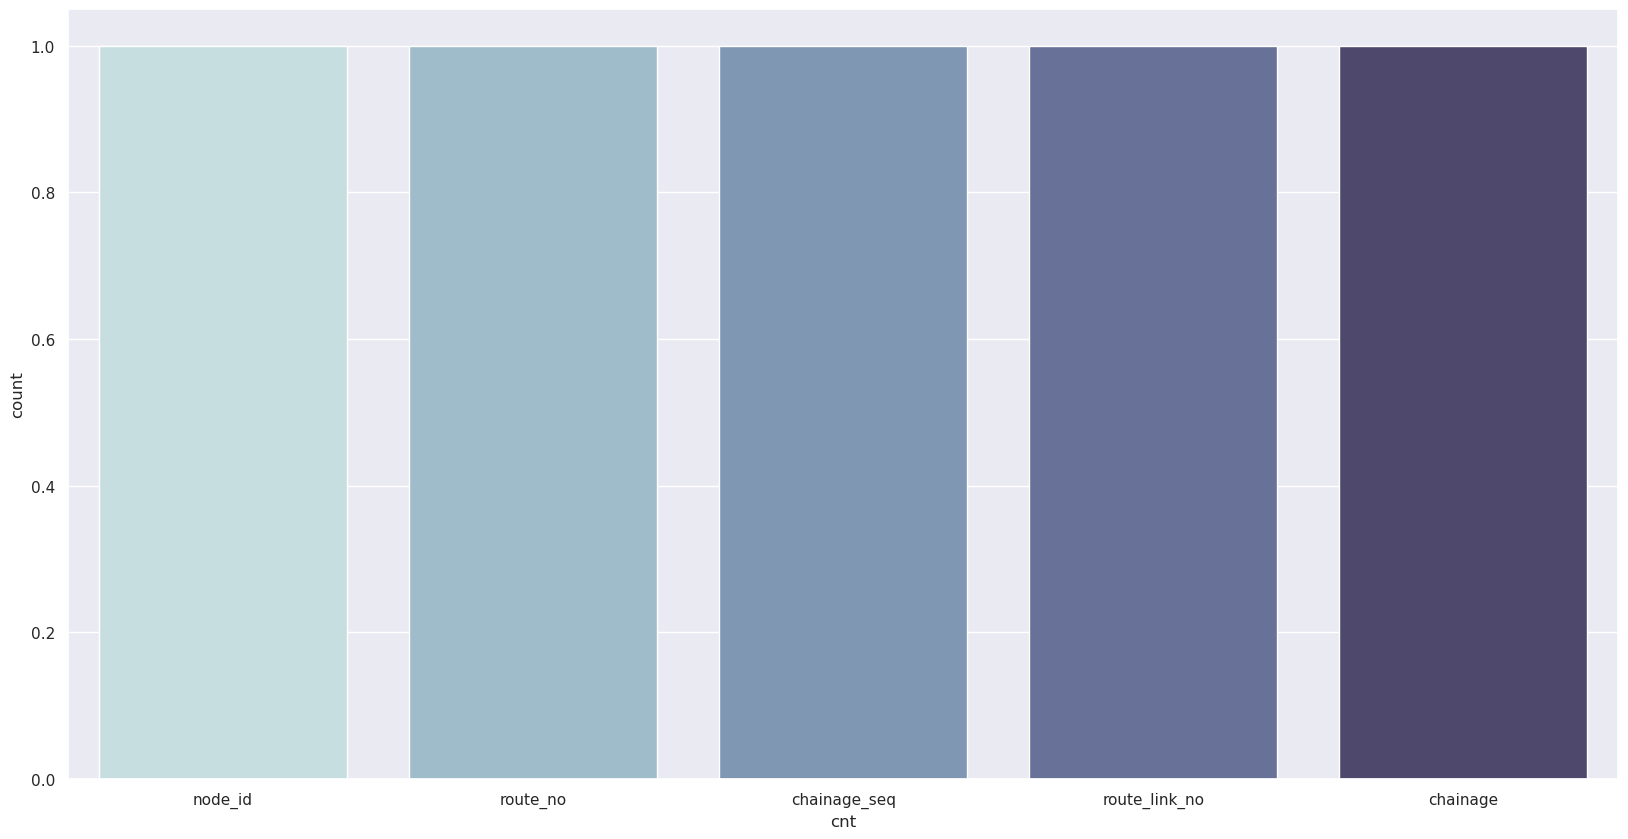

The Accident_Event table's missing value plot is: 



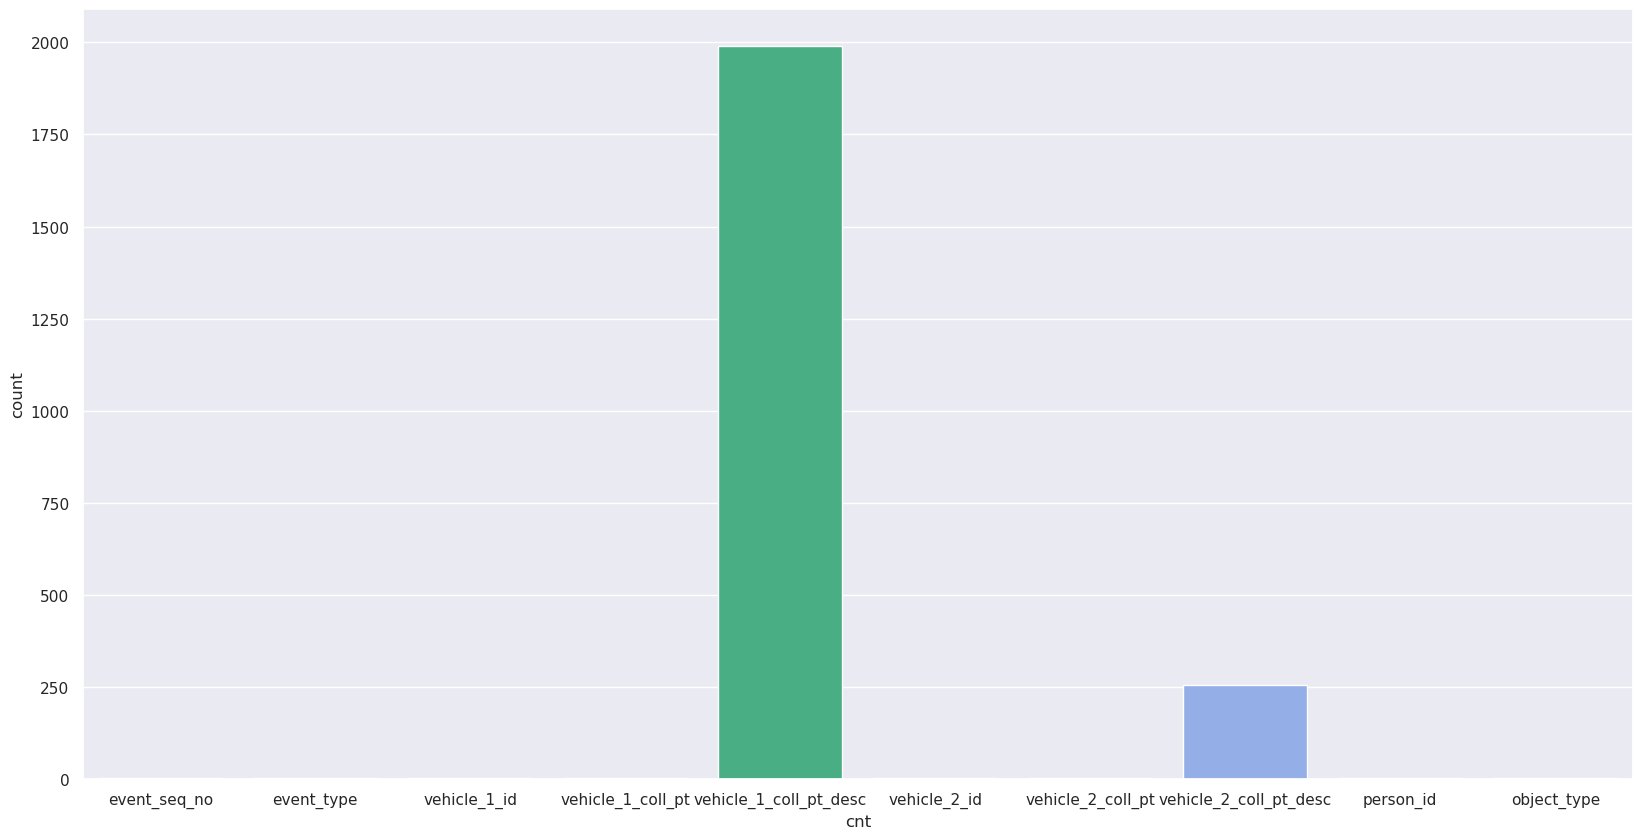

The Accident_Location table's missing value plot is: 



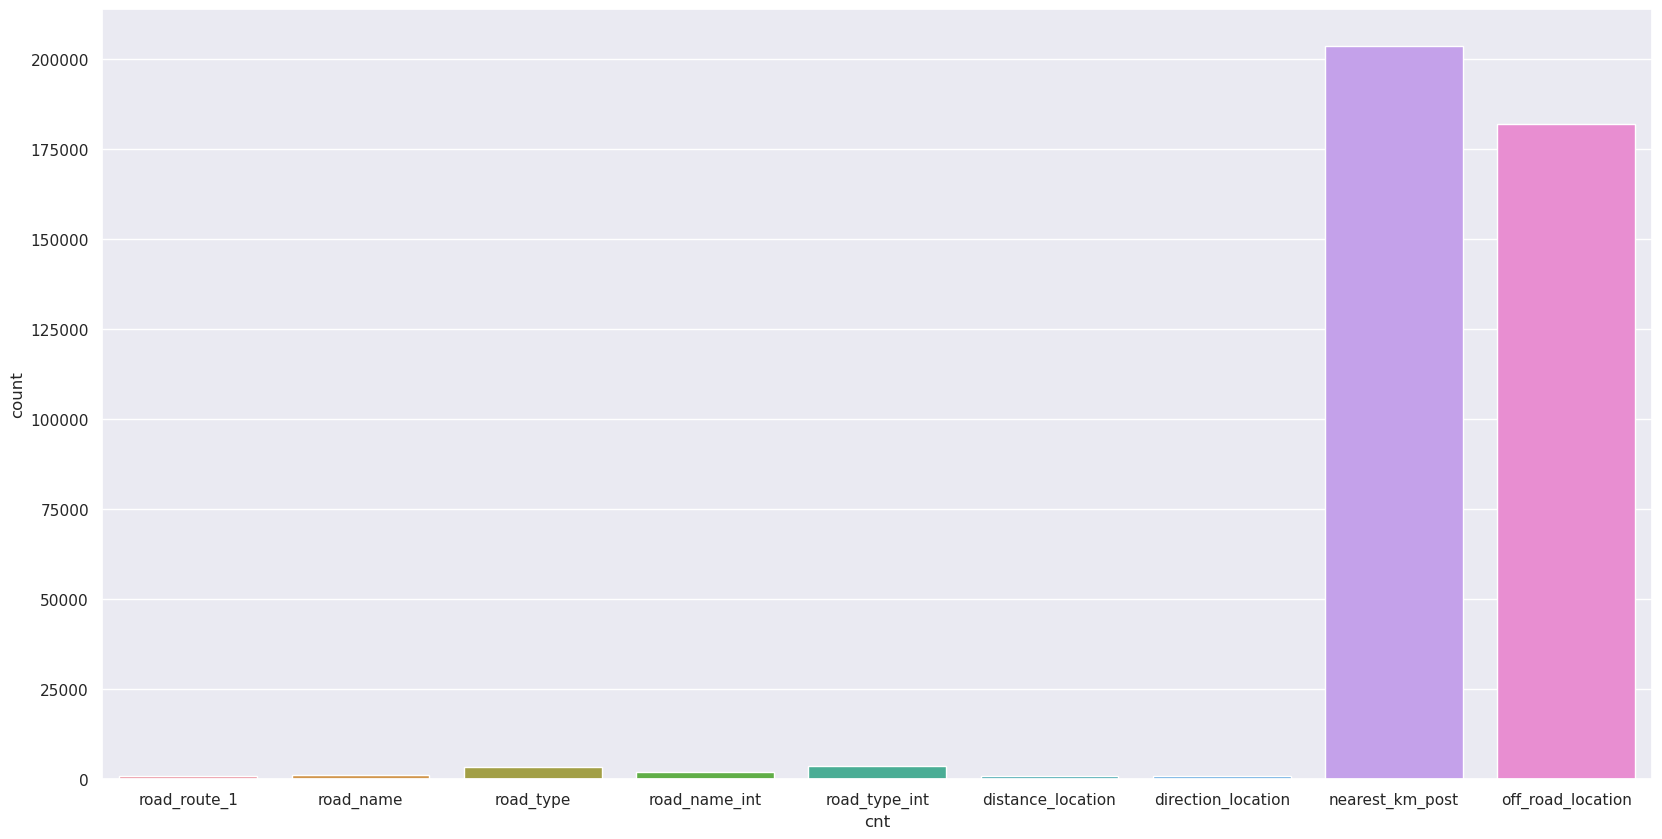

Atmospheric_Conditions table does not have any missing values

The Node_ID_CMPLX table's missing value plot is: 



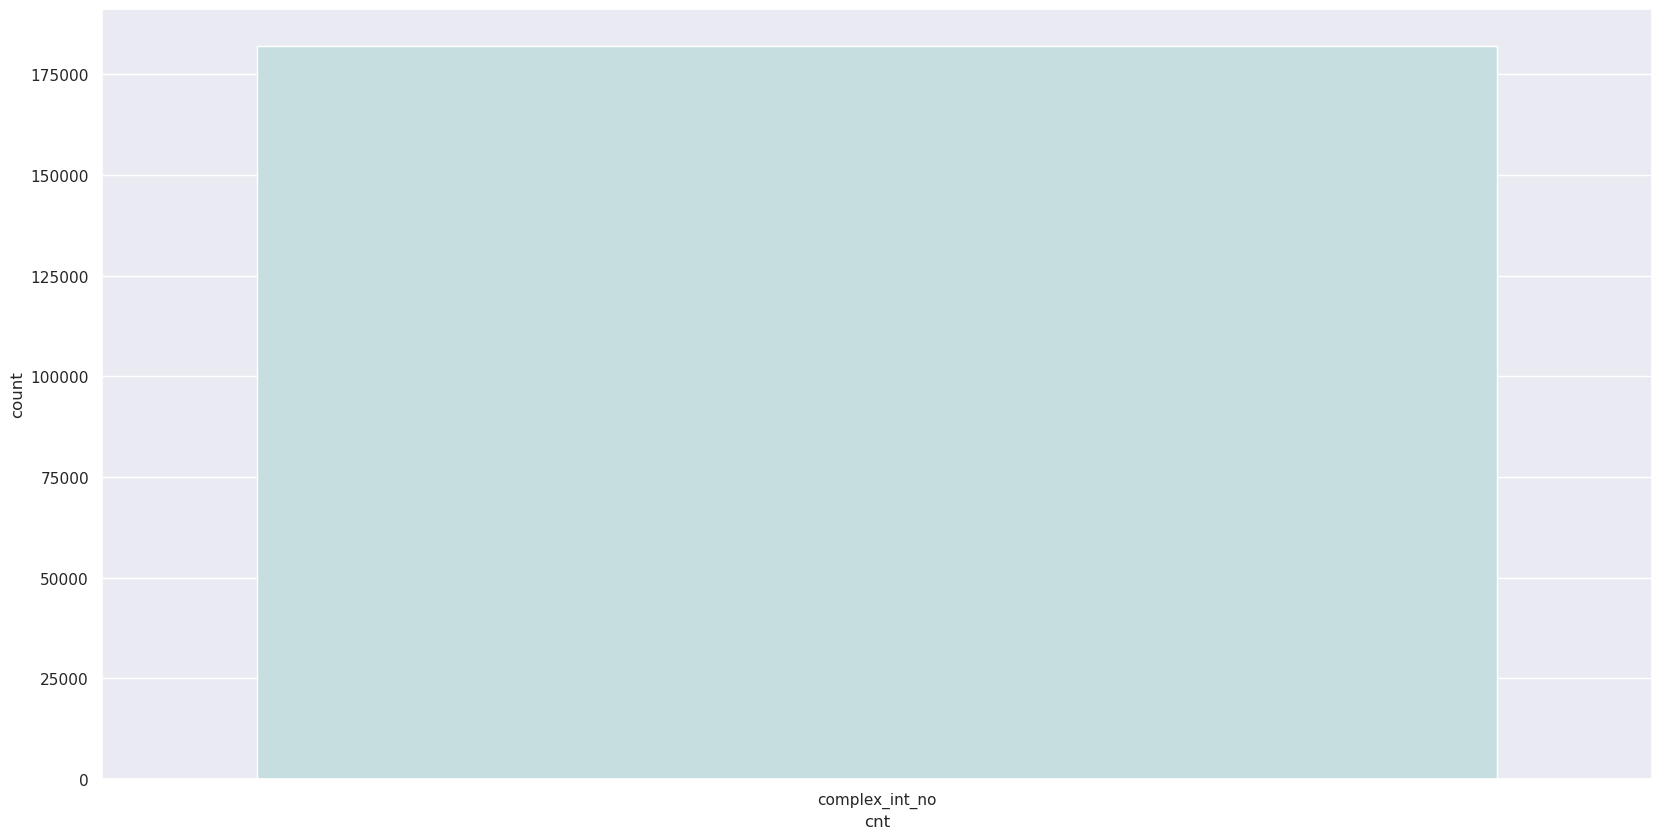

Node table does not have any missing values

The Person table's missing value plot is: 



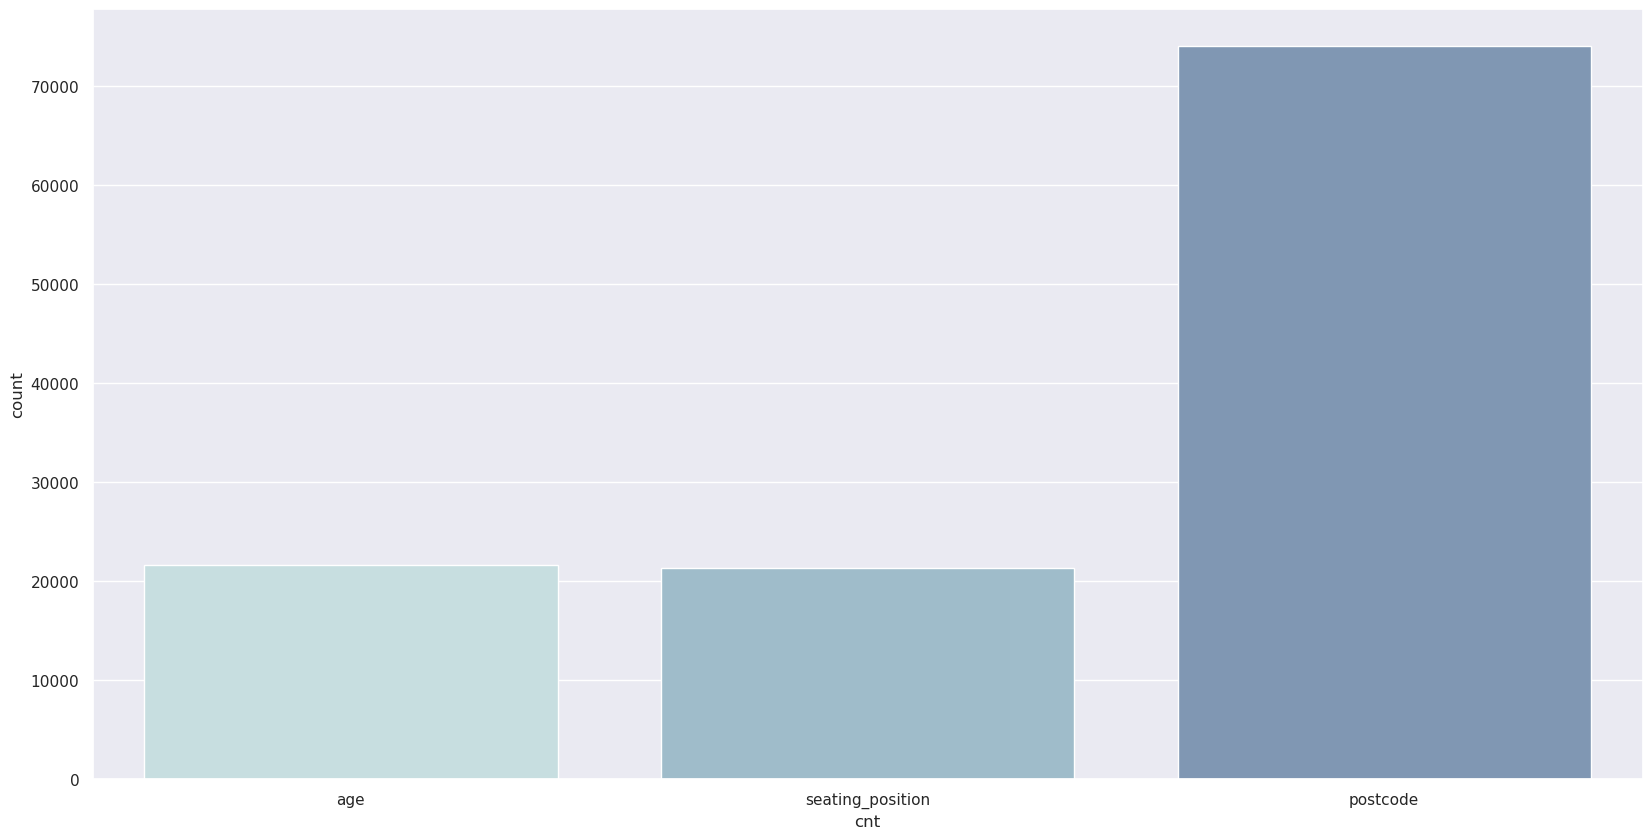

Road_Surface_Conditions table does not have any missing values

SUBDCA table does not have any missing values

The Vehicle table's missing value plot is: 



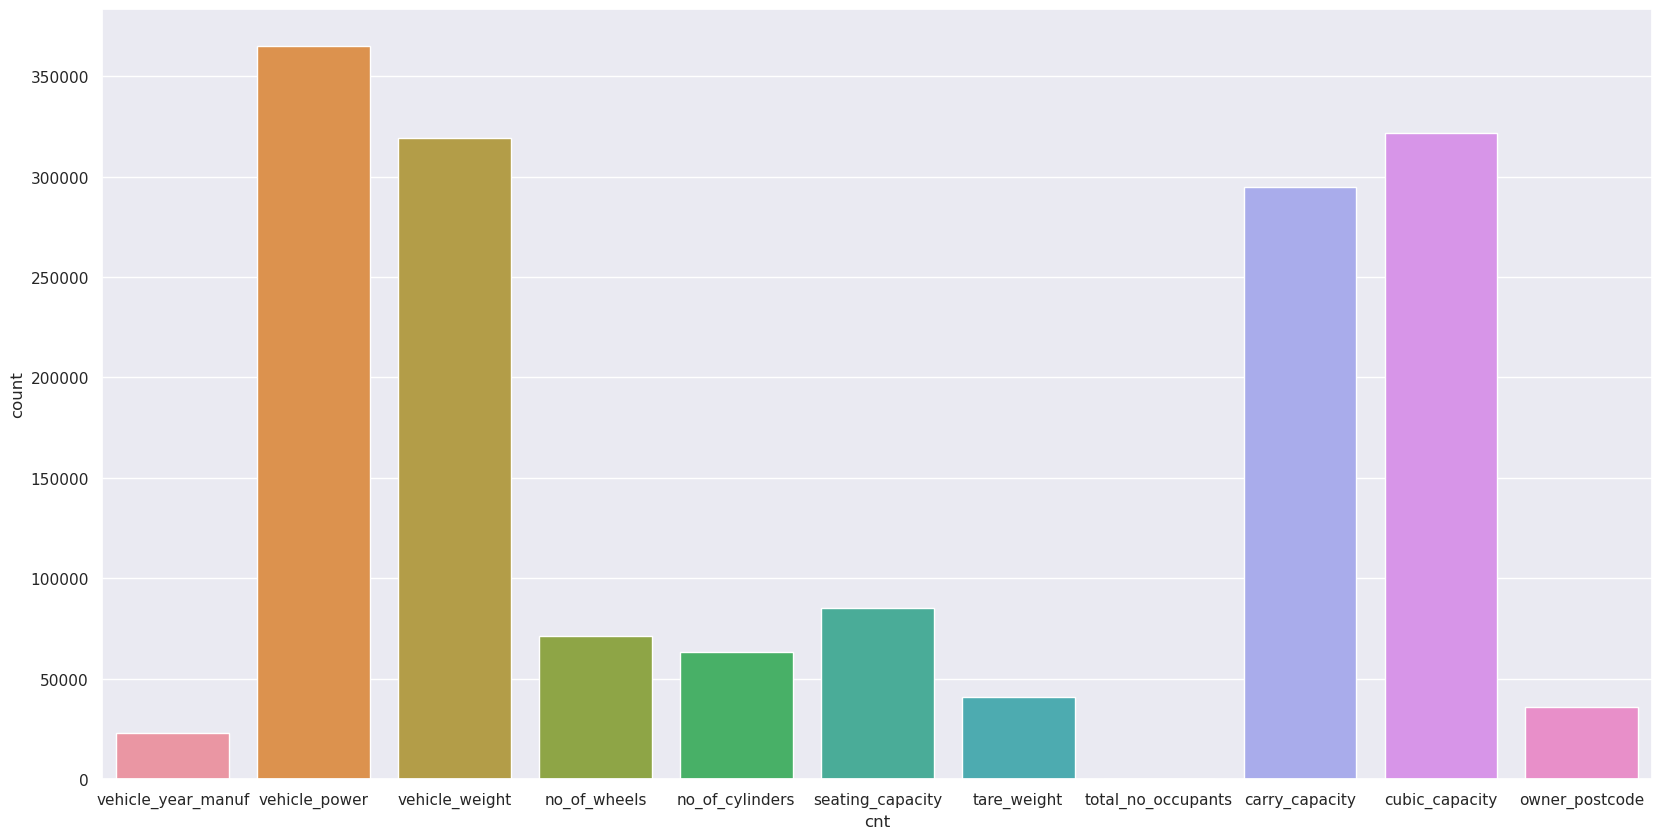

In [12]:
# Missing values
# Lets analyse the tables in dframes and gather the amount of missing values to understand how to further handle them

missing_dframes = []

for dframe_name, dframe in dframes.items():
    if(dframe.isnull().sum() > 0).any():
        missing_dframes.append(dframe_name)
        data = pd.DataFrame({'cnt': list(itertools.chain(*[[row['index']] * row['cnt'] for idx, row in dframe.isnull().sum().to_frame('cnt').reset_index().iterrows()]))})
        sns.countplot(x='cnt', data = data)
        print(red(f'The {dframe_name} table\'s missing value plot is: \n'))
        plt.show()
    else:
        print(green(f'{dframe_name} table does not have any missing values\n'))

In [13]:
missed_dframes = {key:dframes[key] for key in missing_dframes if key in dframes}
missed_dframes

{'Accident':          accident_no accidentdate                    accidenttime  \
 0       T20060000010   2006-01-13  12:42:00                         
 1       T20060000018   2006-01-13  19:10:00                         
 2       T20060000022   2006-01-14  12:10:00                         
 3       T20060000023   2006-01-14  11:49:00                         
 4       T20060000026   2006-01-14  10:45:00                         
 ...              ...          ...                             ...   
 203703  T20200019239   2020-11-01  12:11:00                         
 203704  T20200019247   2020-11-01  15:30:00                         
 203705  T20200019250   2020-11-01  18:00:00                         
 203706  T20200019253   2020-11-01  12:00:00                         
 203707  T20200019417   2020-11-04  01:30:00                         
 
         accident_type                 accident_type_desc  day_of_week  \
 0                   1             Collision with vehicle            6  

The Accident table's missing value colour map is: 



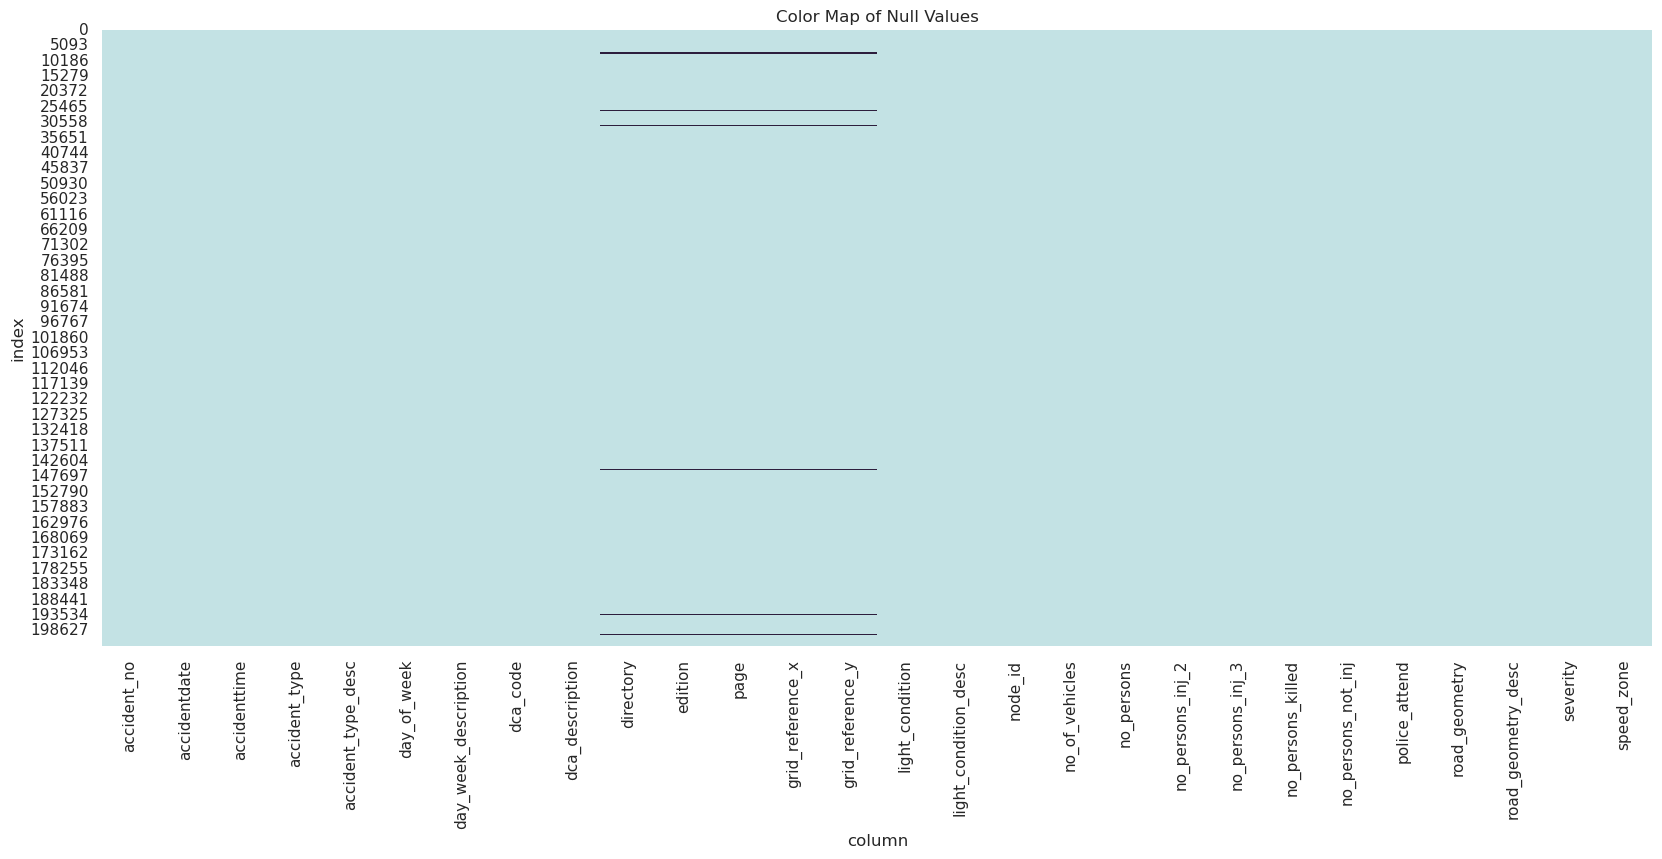

The Accident_Chainage table's missing value colour map is: 



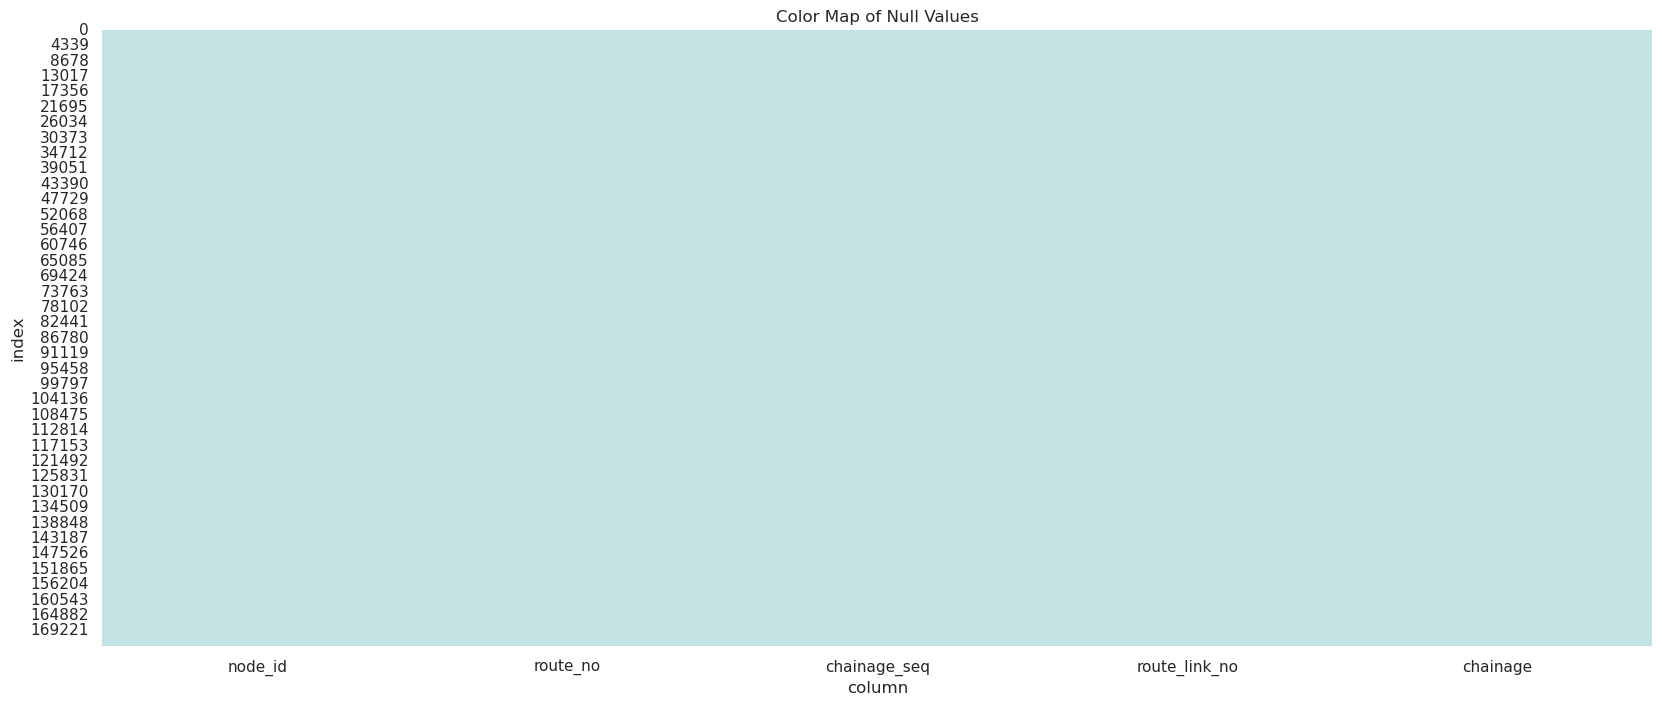

The Accident_Event table's missing value colour map is: 



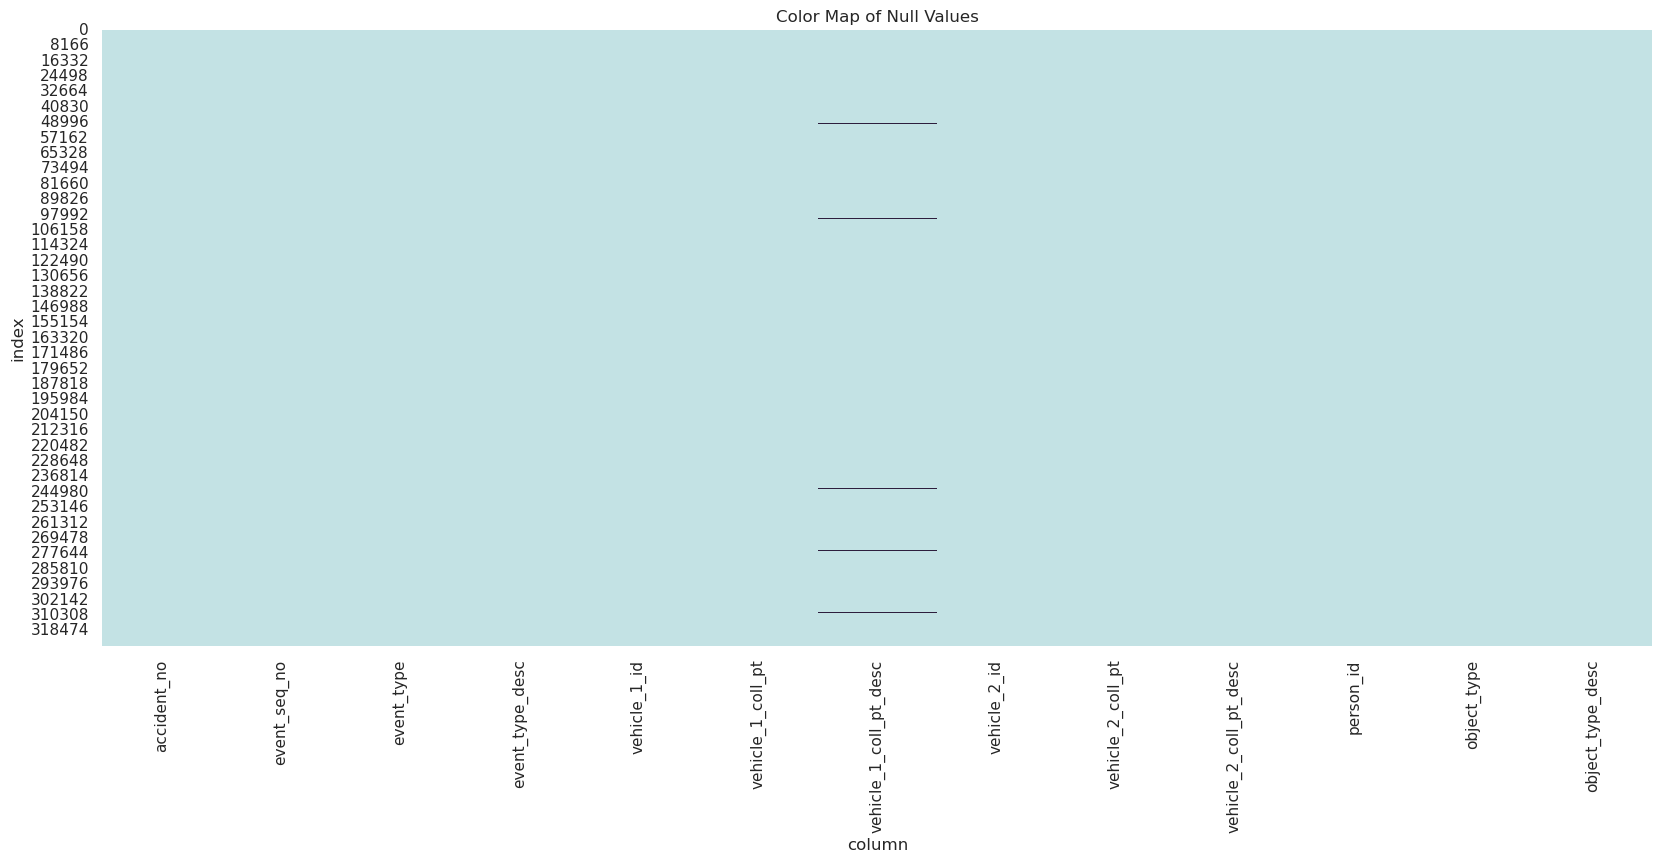

The Accident_Location table's missing value colour map is: 



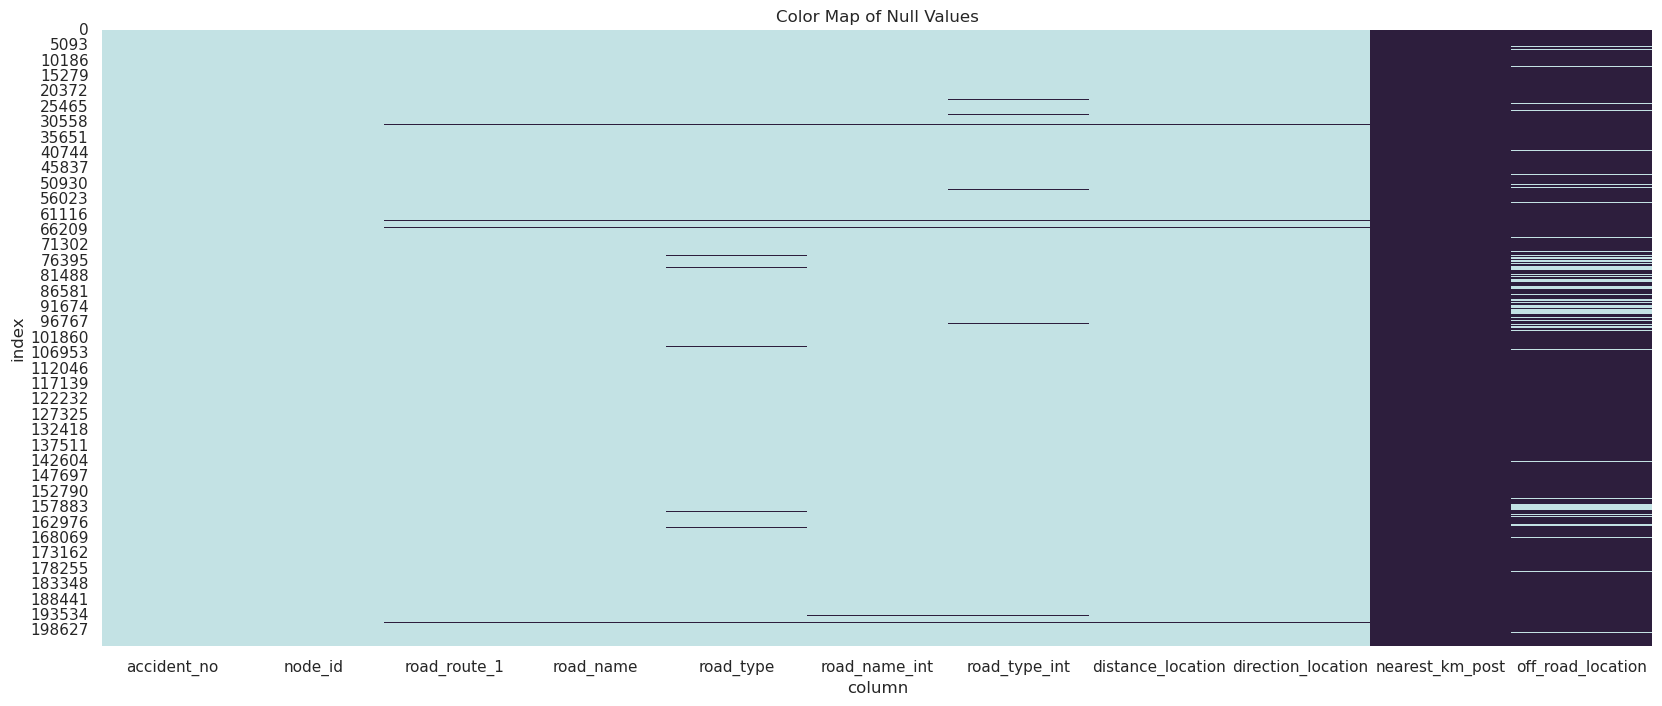

The Node_ID_CMPLX table's missing value colour map is: 



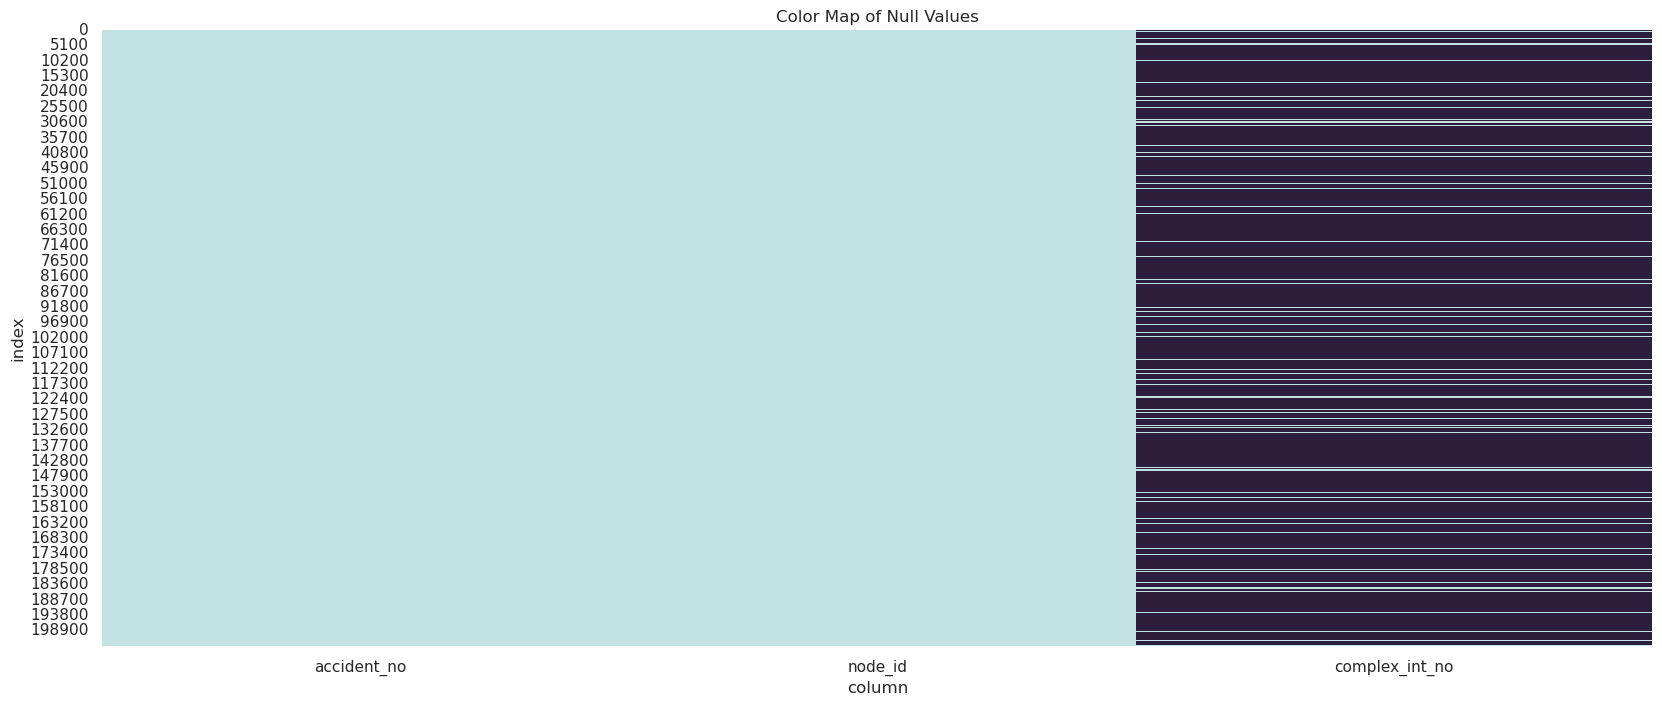

The Person table's missing value colour map is: 



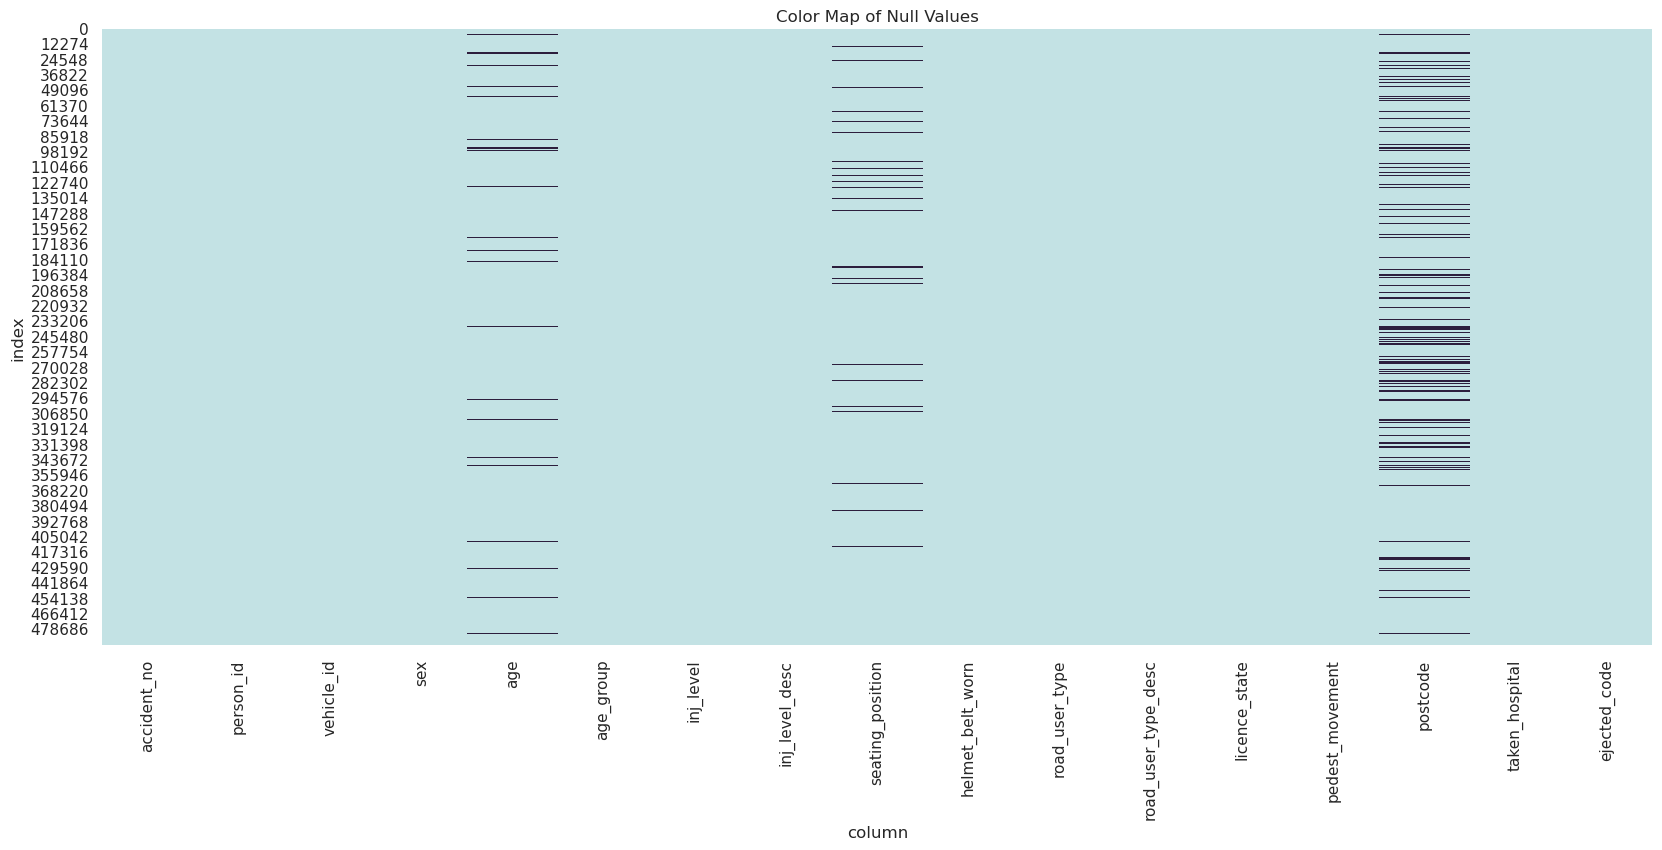

The Vehicle table's missing value colour map is: 



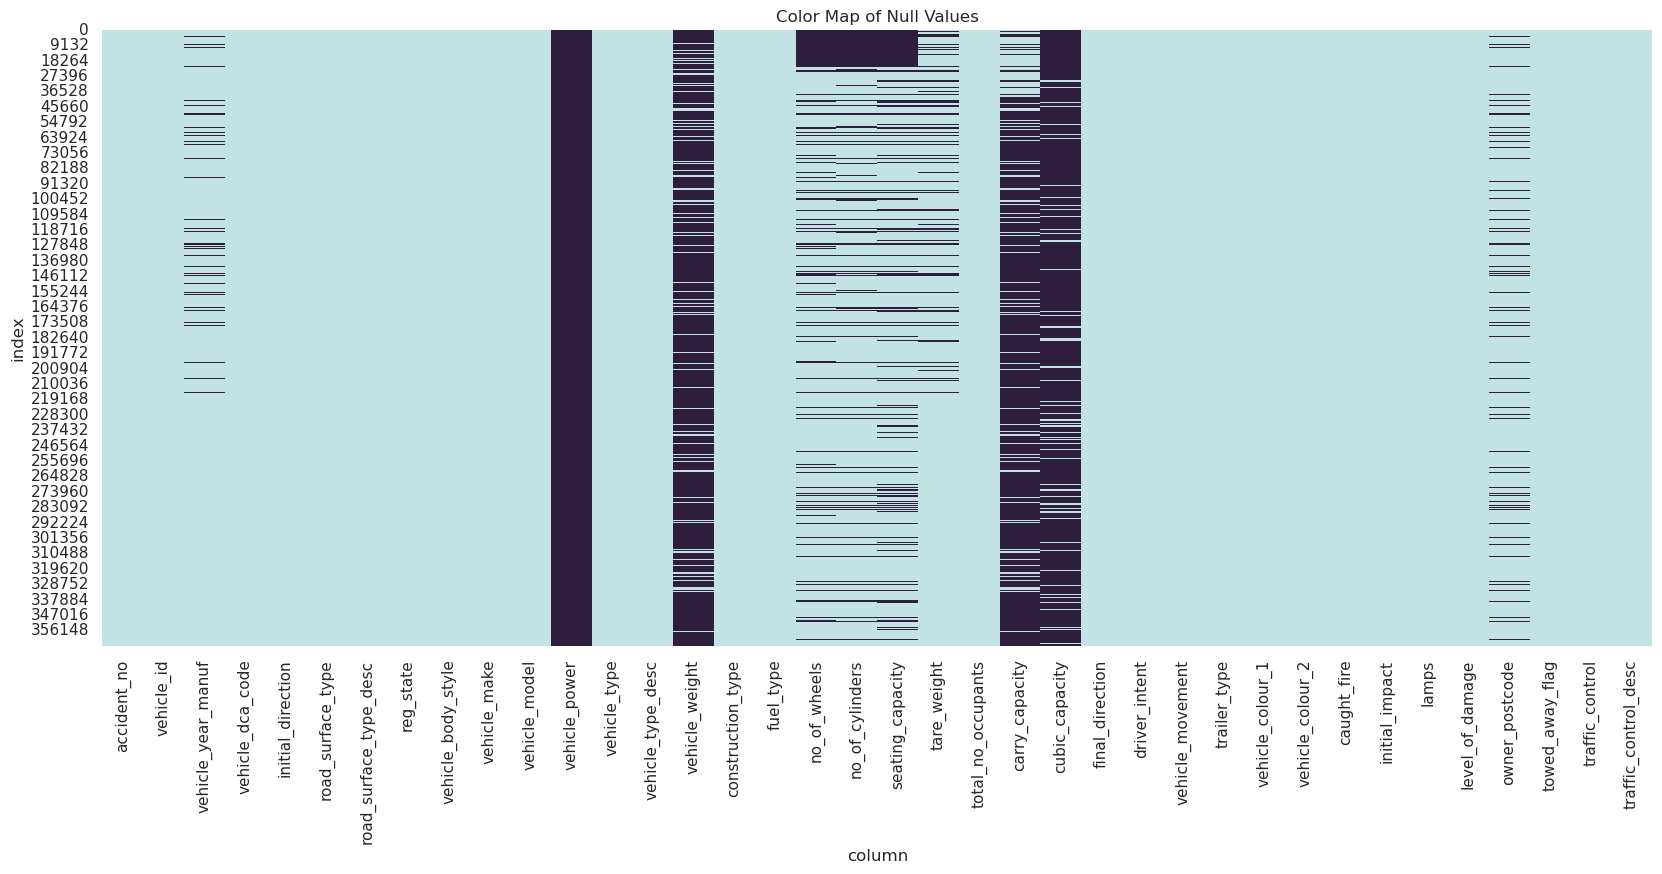

In [14]:
for key, value in missed_dframes.items():
    plt.figure(figsize=(20,8))
    sns.heatmap(value.isnull(), cbar=False, cmap=sns.color_palette(PAL, as_cmap=True))
    plt.ylabel('index')
    plt.xlabel('column')
    plt.title('Color Map of Null Values')
    print(f'The {key} table\'s missing value colour map is: \n')
    plt.show()

## Prominent Info derived from the Colour Maps
##### Accident tables missing values:
- We can notice that directory, edition, page, grid_reference_x & grid_reference_y is missing in the same indexes

##### Accident location missing values:
- There is a significant similarity in indexes missing from columns road_route_1, road_name, distance_location, direction_location

##### Vehicle tables missing values:
- We can notices that the no_of_wheels, no_of_cylinders_seating_capacity, owner_postcode and to some extent the tare_weight is missing in the same indexes
- We can also witnness that the vehicle_weight and carry_capacity is missing in relatively the same indexes

##### Ingest Data
- We use sqlite3 to create a database to save our processed dataframes so we can utilise that going forward for our analysis

In [15]:
## Connect and create a database called proc.db
connect = sql.connect("../data/processed/proc.db")

In [16]:
## store all tables needed in the proc.db database

for key, value in dframes.items():
    value.to_sql(key, connect)

In [17]:
## Lets review if all tables have been successfully ingested into the db
query = connect.cursor()

query.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(query.fetchall())


[('Accident',), ('Accident_Chainage',), ('Accident_Event',), ('Accident_Location',), ('Atmospheric_Conditions',), ('Node_ID_CMPLX',), ('Node',), ('Person',), ('Road_Surface_Conditions',), ('SUBDCA',), ('Vehicle',)]
